In [13]:
import pandas as pd
import pandas as pd 
import geopandas as gpd 
from shapely.geometry import Point, Polygon
from datetime import datetime
from matplotlib import pyplot as plt

gw_df = pd.read_csv("../../notebooks-and-markdowns/gw_final_df.csv")

catchment=pd.read_csv('/home/kmk58/remoteData/Catchmentlsm/catchment_lsm_data.csv')




In [6]:
catchment

,Unnamed: 0,time,lon,lat,SWE_tavg,SoilMoist_S_tavg,SoilMoist_RZ_tavg,TWS_tavg,GWS_tavg,CanopInt_tavg
0,0,2003-02-01,-119.875,34.625,0.000000e+00,5.473309,266.17612,913.22020,647.02720,0.016880
1,1,2003-02-01,-119.875,34.875,0.000000e+00,5.410299,263.24045,929.41003,666.14690,0.022690
2,2,2003-02-01,-119.875,35.125,0.000000e+00,6.250160,306.53458,1121.88460,815.30963,0.040442
3,3,2003-02-01,-119.875,35.375,1.865105e-07,6.151115,302.93890,1146.03090,843.05460,0.037314
4,4,2003-02-01,-119.875,35.625,0.000000e+00,6.037356,299.69397,1131.89770,832.17010,0.033671
...,...,...,...,...,...,...,...,...,...,...
1017015,1017015,2023-02-01,-100.125,42.875,6.911293e+00,4.496682,219.96095,1254.75730,1027.87390,0.011144
1017016,1017016,2023-02-01,-100.125,43.125,6.082870e+00,4.521704,221.28735,1265.41420,1038.03640,0.007619
1017017,1017017,2023-02-01,-100.125,43.375,5.538712e+00,5.406615,265.98350,1521.56790,1250.03860,0.007127
1017018,1017018,2023-02-01,-100.125,43.625,4.400961e+00,5.295809,261.18250,1498.82180,1233.23110,0.007261


In [10]:
catchment['GWS_tavg'].describe()

count    241.000000
mean     610.109749
std       25.619739
min      550.508169
25%      591.717844
50%      606.431259
75%      626.918731
max      686.465645
Name: GWS_tavg, dtype: float64

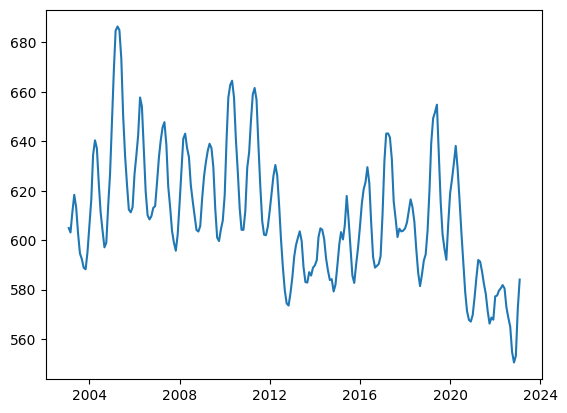

In [16]:
catchment['time']=[datetime.strptime(str(t)[0:7], '%Y-%m') for t in catchment["time"]]

catchment_gws = catchment[['time','GWS_tavg']]
catchment_gws = catchment_gws.groupby(['time']).mean().reset_index()

plt.plot('time', 'GWS_tavg', data=catchment_gws)
plt.show()

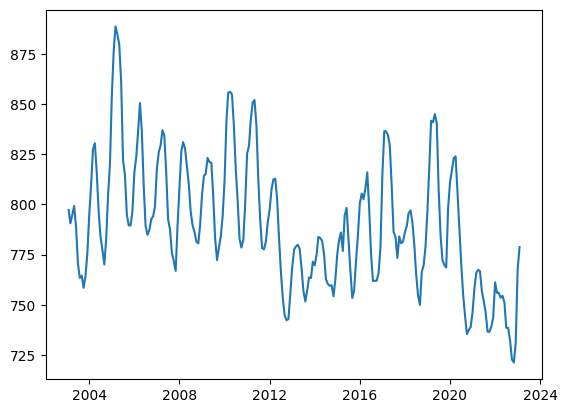

In [17]:
# tws 
catchment_tws = catchment[['time','TWS_tavg']]
catchment_tws = catchment_tws.groupby(['time']).mean().reset_index()

plt.plot('time', 'TWS_tavg', data=catchment_tws)
plt.show()

In [5]:
gw_df

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,gw_estimate
0,2002-04-01,-107.875,36.125,1.351319,0.000125,16.043537,58.864773,123.72265,215.24927,-2.977210,-1.751896,0.608043
1,2002-04-01,-107.875,36.375,1.351319,0.000417,15.686712,55.378174,114.68325,205.29121,-2.976918,-2.108721,0.643696
2,2002-04-01,-107.625,36.125,1.351319,0.000792,13.752791,59.226530,119.29755,219.59993,-2.976543,-4.042642,0.837050
3,2002-04-01,-107.625,36.375,1.351319,0.000958,15.809375,57.523930,118.31177,211.63809,-2.976376,-1.986058,0.631375
4,2002-04-01,-107.875,36.625,1.351319,0.000500,12.120471,43.628730,79.70053,165.92589,-2.976835,-5.674962,1.000312
...,...,...,...,...,...,...,...,...,...,...,...,...
254315,2023-04-01,-117.125,33.375,-16.130844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254316,2023-04-01,-117.375,33.625,-16.130844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254317,2023-04-01,-117.375,33.875,-16.130844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254318,2023-04-01,-117.125,33.625,-16.130844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
